Here, we will look utilize the FFNN.py code to look at the MSE performance, and explore different configurations


50 nodes : Epoch, 0, Loss: 21.594487
50 nodes : Epoch, 20, Loss: 0.125153
50 nodes : Epoch, 40, Loss: 0.116593
50 nodes : Epoch, 60, Loss: 0.110291
50 nodes : Epoch, 80, Loss: 0.104670
100 nodes : Epoch, 0, Loss: 13.588762
100 nodes : Epoch, 20, Loss: 0.220388
100 nodes : Epoch, 40, Loss: 0.099694
100 nodes : Epoch, 60, Loss: 0.099429
100 nodes : Epoch, 80, Loss: 0.099185


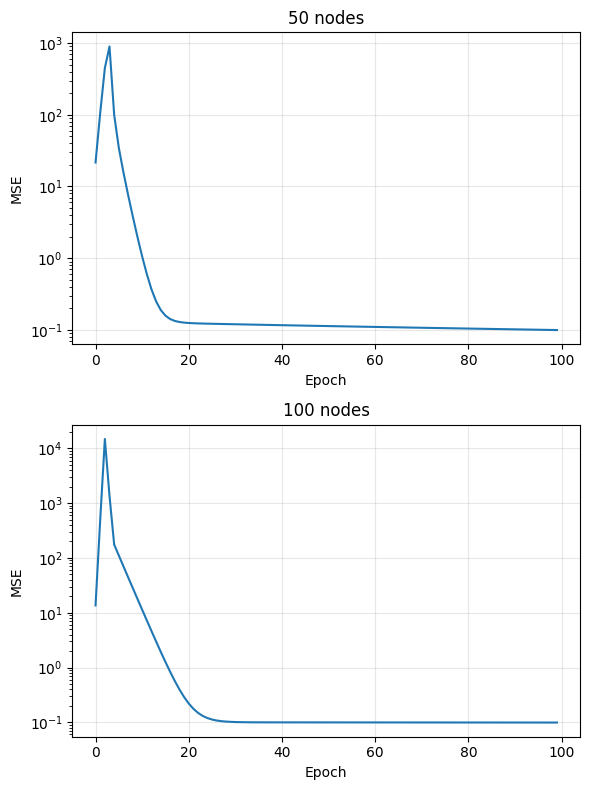

In [ ]:
import sys
sys.path.insert(0, '../')
import numpy as np
np.random.seed(314)
from FFNN import FFNN
from functions import * 


x = np.linspace(-1,1,20).reshape(-1,1)  # 20 rows, 1 column
y = runge_function(x) 
y_min = np.min(y) 
y_max = np.max(y)
y_scaled = (y - y_min) / (y_max - y_min)

activations = [sigmoid, identity]
derivatives = [sigmoid_derivative, identity_derivative]



#create FFNN trained on dataset, not polynomial expansion, for one and two hidden layers using 50 and 100 hidden nodes respectively. 
#100 iterations train 
one_layer_batch_50 = FFNN(1,[50,1])
losses_50 = []

for epoch in range(100):
    output = one_layer_batch_50.forward_pass(x, activations)
    one_layer_batch_50.backward_pass(y, derivatives, learning_rate=0.1)
    loss = np.mean((output - y)**2)
    losses_50.append(loss)

    if epoch % 20 == 0:
        print(f"50 nodes : Epoch, {epoch}, Loss: {loss:.6f}")

losses_100 = []
one_layer_batch_100 = FFNN(1,[100,1])

for epoch in range(100):
    output = one_layer_batch_100.forward_pass(x, activations)
    one_layer_batch_100.backward_pass(y, derivatives, learning_rate=0.1)
    loss = np.mean((output - y)**2)
    losses_100.append(loss)
    if epoch % 20 == 0:
        print(f"100 nodes : Epoch, {epoch}, Loss: {loss:.6f}")

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(6,8))

ax[0].plot(losses_50)
ax[0].set_title('50 nodes')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('MSE')
ax[0].set_yscale('log')
ax[0].grid(True, alpha=0.3)

ax[1].plot(losses_100)
ax[1].set_title('100 nodes')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('MSE')
ax[1].set_yscale('log')
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("figures/loss_comparison.pdf", dpi=300)
plt.show()

""" Results
50 nodes : Epoch, 0, Loss: 21.594487
50 nodes : Epoch, 20, Loss: 0.125153
50 nodes : Epoch, 40, Loss: 0.116593
50 nodes : Epoch, 60, Loss: 0.110291
50 nodes : Epoch, 80, Loss: 0.104670
100 nodes : Epoch, 0, Loss: 13.588762
100 nodes : Epoch, 20, Loss: 0.220388
100 nodes : Epoch, 40, Loss: 0.099694
100 nodes : Epoch, 60, Loss: 0.099429
100 nodes : Epoch, 80, Loss: 0.099185
"""


50 nodes : Epoch 0, Loss: 10.264478
50 nodes : Epoch 20, Loss: 0.058847
50 nodes : Epoch 40, Loss: 0.034762
50 nodes : Epoch 60, Loss: 0.028410
50 nodes : Epoch 80, Loss: 0.025295
100 nodes : Epoch 0, Loss: 22.177799
100 nodes : Epoch 20, Loss: 0.273561
100 nodes : Epoch 40, Loss: 0.142245
100 nodes : Epoch 60, Loss: 0.090825
100 nodes : Epoch 80, Loss: 0.065336


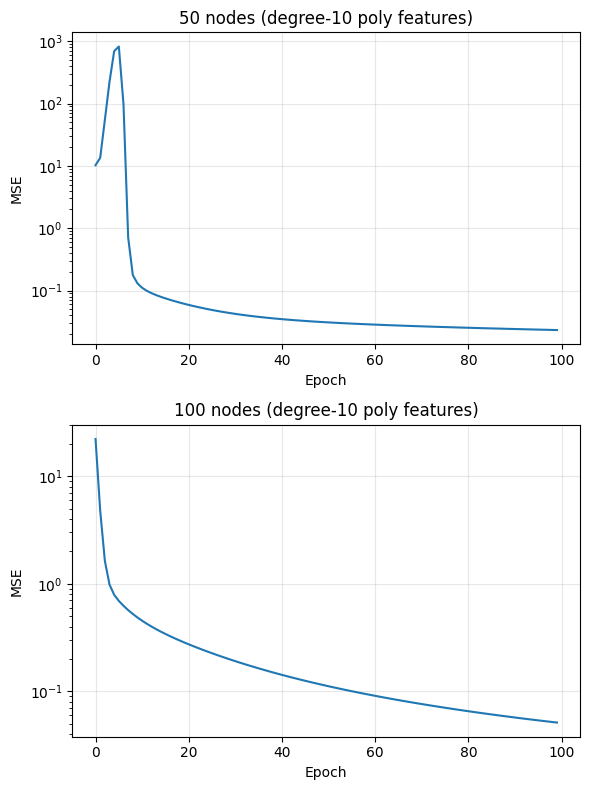

In [ ]:
# for polynomial expansion, deg 10
np.random.seed(314)
from sklearn.preprocessing import StandardScaler

degree = 10 
X_poly = np.vander(x.flatten(), degree)
X_poly = StandardScaler().fit_transform(X_poly)
poly_losses_50 = []
poly_one_layer_50 = FFNN(degree, [50, 1])

for epoch in range(100):
    output = poly_one_layer_50.forward_pass(X_poly, activations)
    poly_one_layer_50.backward_pass(y_scaled, derivatives, learning_rate=0.1)
    loss = np.mean((output - y_scaled)**2)
    poly_losses_50.append(loss)
    
    if epoch % 20 == 0:
        print(f"50 nodes : Epoch {epoch}, Loss: {loss:.6f}")

poly_losses_100 = []
poly_one_layer_100 = FFNN(degree, [100, 1])

for epoch in range(100):
    output = poly_one_layer_100.forward_pass(X_poly, activations)
    poly_one_layer_100.backward_pass(y_scaled, derivatives, learning_rate=0.01)
    loss = np.mean((output - y_scaled)**2)
    poly_losses_100.append(loss)
    
    if epoch % 20 == 0:
        print(f"100 nodes : Epoch {epoch}, Loss: {loss:.6f}")


fig, ax = plt.subplots(2, 1, figsize=(6,8))

ax[0].plot(poly_losses_50)
ax[0].set_title('50 nodes (degree-10 poly features)')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('MSE')
ax[0].set_yscale('log')
ax[0].grid(True, alpha=0.3)

ax[1].plot(poly_losses_100)
ax[1].set_title('100 nodes (degree-10 poly features)')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('MSE')
ax[1].set_yscale('log')
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("figures/loss_comparison_poly.pdf", dpi=300)
plt.show()

"""Results
50 nodes : Epoch 0, Loss: 10.264478
50 nodes : Epoch 20, Loss: 0.058847
50 nodes : Epoch 40, Loss: 0.034762
50 nodes : Epoch 60, Loss: 0.028410
50 nodes : Epoch 80, Loss: 0.025295
100 nodes : Epoch 0, Loss: 22.177799
100 nodes : Epoch 20, Loss: 0.273561
100 nodes : Epoch 40, Loss: 0.142245
100 nodes : Epoch 60, Loss: 0.090825
100 nodes : Epoch 80, Loss: 0.065336
"""

50 nodes : Epoch 0, Loss: 5.229289
50 nodes : Epoch 20, Loss: 0.034464
50 nodes : Epoch 40, Loss: 0.022879
50 nodes : Epoch 60, Loss: 0.018279
50 nodes : Epoch 80, Loss: 0.015711
100 nodes : Epoch 0, Loss: 8.407314
100 nodes : Epoch 20, Loss: 0.033135
100 nodes : Epoch 40, Loss: 0.019714
100 nodes : Epoch 60, Loss: 0.017522
100 nodes : Epoch 80, Loss: 0.015784


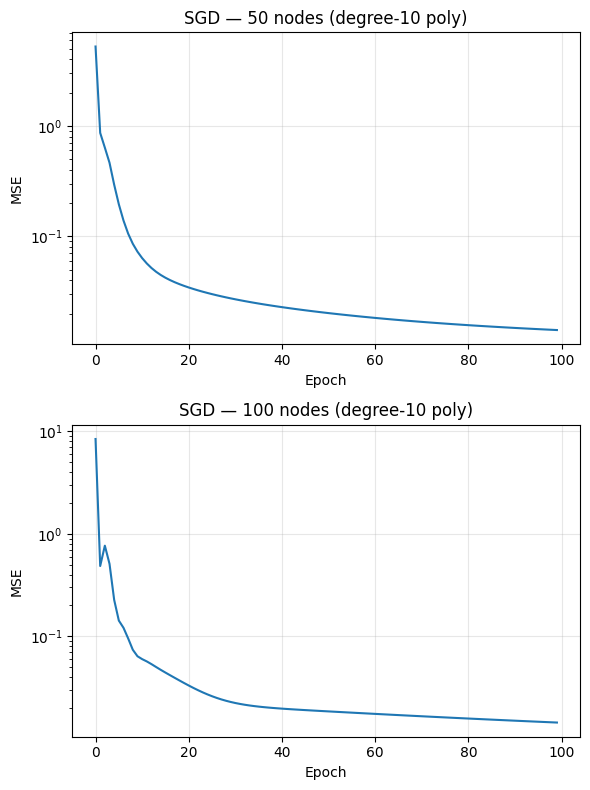

In [ ]:
np.random.seed(314)

sgd_poly_losses_50 = []
sgd_poly_50 = FFNN(degree, [50, 1])

for epoch in range(100):
    for i in range(len(X_poly)):
        x_single = X_poly[i:i+1]
        y_single = y_scaled[i:i+1]
        _ = sgd_poly_50.forward_pass(x_single, activations)
        sgd_poly_50.backward_pass(y_single, derivatives, learning_rate=0.01)

    output_full = sgd_poly_50.forward_pass(X_poly, activations)
    loss = np.mean((output_full - y_scaled)**2)
    sgd_poly_losses_50.append(loss)
    if epoch % 20 == 0:
        print(f"50 nodes : Epoch {epoch}, Loss: {loss:.6f}")

sgd_poly_losses_100 = []
sgd_poly_100 = FFNN(degree, [100, 1])

for epoch in range(100):
    for i in range(len(X_poly)):
        x_single = X_poly[i:i+1]
        y_single = y_scaled[i:i+1]
        _ = sgd_poly_100.forward_pass(x_single, activations)
        sgd_poly_100.backward_pass(y_single, derivatives, learning_rate=0.01)

    output_full = sgd_poly_100.forward_pass(X_poly, activations)
    loss = np.mean((output_full - y_scaled)**2)
    sgd_poly_losses_100.append(loss)
    if epoch % 20 == 0:
        print(f"100 nodes : Epoch {epoch}, Loss: {loss:.6f}")

fig, ax = plt.subplots(2, 1, figsize=(6,8))

ax[0].plot(sgd_poly_losses_50)
ax[0].set_title('SGD — 50 nodes (degree-10 poly)')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('MSE')
ax[0].set_yscale('log')
ax[0].grid(True, alpha=0.3)

ax[1].plot(sgd_poly_losses_100)
ax[1].set_title('SGD — 100 nodes (degree-10 poly)')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('MSE')
ax[1].set_yscale('log')
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("figures/loss_sgd_poly.pdf", dpi=300)
plt.show()

"""Results
50 nodes : Epoch 0, Loss: 5.229289
50 nodes : Epoch 20, Loss: 0.034464
50 nodes : Epoch 40, Loss: 0.022879
50 nodes : Epoch 60, Loss: 0.018279
50 nodes : Epoch 80, Loss: 0.015711
100 nodes : Epoch 0, Loss: 8.407314
100 nodes : Epoch 20, Loss: 0.033135
100 nodes : Epoch 40, Loss: 0.019714
100 nodes : Epoch 60, Loss: 0.017522
100 nodes : Epoch 80, Loss: 0.015784
"""


50 nodes : Epoch 0, Loss: 3.173699
50 nodes : Epoch 20, Loss: 1.050683
50 nodes : Epoch 40, Loss: 0.015315
50 nodes : Epoch 60, Loss: 1.450043
50 nodes : Epoch 80, Loss: 0.011794
100 nodes : Epoch 0, Loss: 15.896474
100 nodes : Epoch 20, Loss: 0.280754
100 nodes : Epoch 40, Loss: 2.115306
100 nodes : Epoch 60, Loss: 0.232826
100 nodes : Epoch 80, Loss: 0.062603


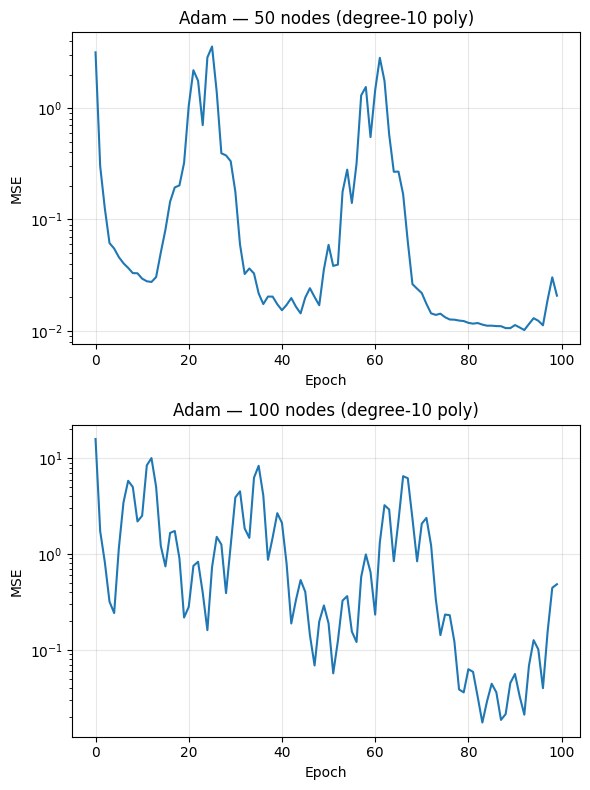

In [ ]:
from optimizers import FFNN_Adam
np.random.seed(314)


adam_losses_50 = []
adam_50 = FFNN_Adam(degree, [50, 1])

for epoch in range(100):
    for i in range(len(X_poly)):
        x_single = X_poly[i:i+1]
        y_single = y_scaled[i:i+1]
        _ = adam_50.forward_pass(x_single, activations)
        adam_50.backward_pass(y_single, derivatives, learning_rate=0.01)

    output_full = adam_50.forward_pass(X_poly, activations)
    loss = np.mean((output_full - y_scaled)**2)
    adam_losses_50.append(loss)
    if epoch % 20 == 0:
        print(f"50 nodes : Epoch {epoch}, Loss: {loss:.6f}")

adam_losses_100 = []
adam_100 = FFNN_Adam(degree, [100, 1])

for epoch in range(100):
    for i in range(len(X_poly)):
        x_single = X_poly[i:i+1]
        y_single = y_scaled[i:i+1]
        _ = adam_100.forward_pass(x_single, activations)
        adam_100.backward_pass(y_single, derivatives, learning_rate=0.01)

    output_full = adam_100.forward_pass(X_poly, activations)
    loss = np.mean((output_full - y_scaled)**2)
    adam_losses_100.append(loss)
    if epoch % 20 == 0:
        print(f"100 nodes : Epoch {epoch}, Loss: {loss:.6f}")

fig, ax = plt.subplots(2, 1, figsize=(6,8))

ax[0].plot(adam_losses_50)
ax[0].set_title('Adam — 50 nodes (degree-10 poly)')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('MSE')
ax[0].set_yscale('log')
ax[0].grid(True, alpha=0.3)

ax[1].plot(adam_losses_100)
ax[1].set_title('Adam — 100 nodes (degree-10 poly)')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('MSE')
ax[1].set_yscale('log')
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("figures/loss_adam_poly.pdf", dpi=300)
plt.show()

"""Results
50 nodes : Epoch 0, Loss: 3.173699
50 nodes : Epoch 20, Loss: 1.050683
50 nodes : Epoch 40, Loss: 0.015315
50 nodes : Epoch 60, Loss: 1.450043
50 nodes : Epoch 80, Loss: 0.011794
100 nodes : Epoch 0, Loss: 15.896474
100 nodes : Epoch 20, Loss: 0.280754
100 nodes : Epoch 40, Loss: 2.115306
100 nodes : Epoch 60, Loss: 0.232826
100 nodes : Epoch 80, Loss: 0.062603
"""



50 nodes : Epoch 0, Loss: 3.223170
50 nodes : Epoch 20, Loss: 0.171854
50 nodes : Epoch 40, Loss: 0.410575
50 nodes : Epoch 60, Loss: 0.213821
50 nodes : Epoch 80, Loss: 0.067464
100 nodes : Epoch 0, Loss: 3.733470
100 nodes : Epoch 20, Loss: 0.290430
100 nodes : Epoch 40, Loss: 0.210850
100 nodes : Epoch 60, Loss: 0.107029
100 nodes : Epoch 80, Loss: 0.085915


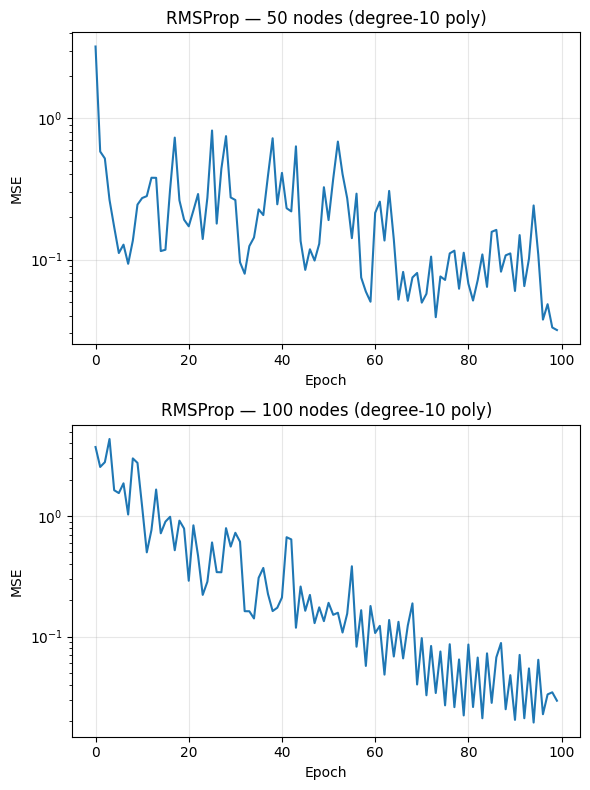

In [ ]:
from optimizers import FFNN_RMSProp
np.random.seed(314)

rmsprop_losses_50 = []
rmsprop_50 = FFNN_RMSProp(degree, [50, 1])

for epoch in range(100):
    for i in range(len(X_poly)):
        x_single = X_poly[i:i+1]
        y_single = y_scaled[i:i+1]
        _ = rmsprop_50.forward_pass(x_single, activations)
        rmsprop_50.backward_pass(y_single, derivatives, learning_rate=0.01)

    output_full = rmsprop_50.forward_pass(X_poly, activations)
    loss = np.mean((output_full - y_scaled)**2)
    rmsprop_losses_50.append(loss)
    if epoch % 20 == 0:
        print(f"50 nodes : Epoch {epoch}, Loss: {loss:.6f}")

rmsprop_losses_100 = []
rmsprop_100 = FFNN_RMSProp(degree, [100, 1])

for epoch in range(100):
    for i in range(len(X_poly)):
        x_single = X_poly[i:i+1]
        y_single = y_scaled[i:i+1]
        _ = rmsprop_100.forward_pass(x_single, activations)
        rmsprop_100.backward_pass(y_single, derivatives, learning_rate=0.01)

    output_full = rmsprop_100.forward_pass(X_poly, activations)
    loss = np.mean((output_full - y_scaled)**2)
    rmsprop_losses_100.append(loss)
    if epoch % 20 == 0:
        print(f"100 nodes : Epoch {epoch}, Loss: {loss:.6f}")

fig, ax = plt.subplots(2, 1, figsize=(6,8))

ax[0].plot(rmsprop_losses_50)
ax[0].set_title('RMSProp — 50 nodes (degree-10 poly)')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('MSE')
ax[0].set_yscale('log')
ax[0].grid(True, alpha=0.3)

ax[1].plot(rmsprop_losses_100)
ax[1].set_title('RMSProp — 100 nodes (degree-10 poly)')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('MSE')
ax[1].set_yscale('log')
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("figures/loss_rmsprop_poly.pdf", dpi=300)
plt.show()

""" Results
50 nodes : Epoch 0, Loss: 3.223170
50 nodes : Epoch 20, Loss: 0.171854
50 nodes : Epoch 40, Loss: 0.410575
50 nodes : Epoch 60, Loss: 0.213821
50 nodes : Epoch 80, Loss: 0.067464
100 nodes : Epoch 0, Loss: 3.733470
100 nodes : Epoch 20, Loss: 0.290430
100 nodes : Epoch 40, Loss: 0.210850
100 nodes : Epoch 60, Loss: 0.107029
100 nodes : Epoch 80, Loss: 0.085915
"""

c:\Users\vikto\Desktop\fysstk3155\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\vikto\Desktop\fysstk3155\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


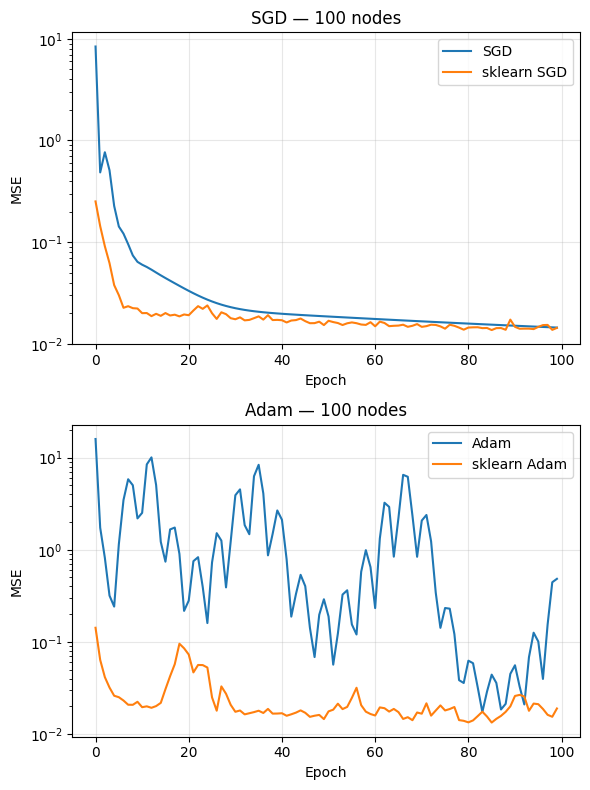

In [89]:
np.random.seed(314)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

X_raw = np.vander(x.flatten(), degree)
y_skl = y_scaled.ravel().astype(float)

mlp_sgd = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(100,), activation='identity',
                 solver='sgd', batch_size=1, shuffle=True,
                 learning_rate_init=1e-3, max_iter=100, tol=0, n_iter_no_change=1000,
                 random_state=314)
)

mlp_adam = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(100,), activation='identity',
                 solver='adam', batch_size=1, shuffle=True,
                 learning_rate_init=1e-3, max_iter=100, tol=0, n_iter_no_change=1000,
                 random_state=314)
)

mlp_sgd.fit(X_raw, y_skl)
mlp_adam.fit(X_raw, y_skl)

loss_sgd  = mlp_sgd.named_steps['mlpregressor'].loss_curve_
loss_adam = mlp_adam.named_steps['mlpregressor'].loss_curve_

fig, ax = plt.subplots(2, 1, figsize=(6,8))

ax[0].plot(sgd_poly_losses_100, label='SGD')
ax[0].plot(loss_sgd, label='sklearn SGD')
ax[0].set_title('SGD — 100 nodes'); ax[0].set_xlabel('Epoch'); ax[0].set_ylabel('MSE')
ax[0].set_yscale('log'); ax[0].grid(alpha=0.3); ax[0].legend()

ax[1].plot(adam_losses_100, label='Adam')
ax[1].plot(loss_adam, label='sklearn Adam')
ax[1].set_title('Adam — 100 nodes'); ax[1].set_xlabel('Epoch'); ax[1].set_ylabel('MSE')
ax[1].set_yscale('log'); ax[1].grid(alpha=0.3); ax[1].legend()

plt.tight_layout()
plt.savefig("figures/loss_compare_sklearn_100_sgdadam.pdf", dpi=300)
plt.show()
